Enter numbers separated by space:  5 3 8 6 2


Sorting steps:


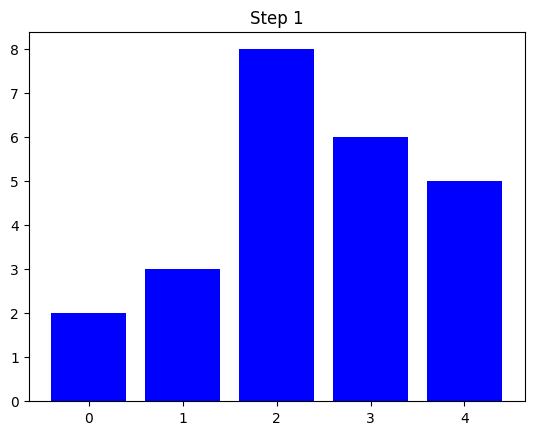

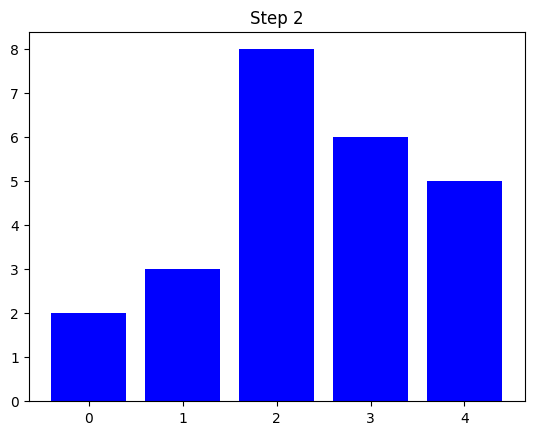

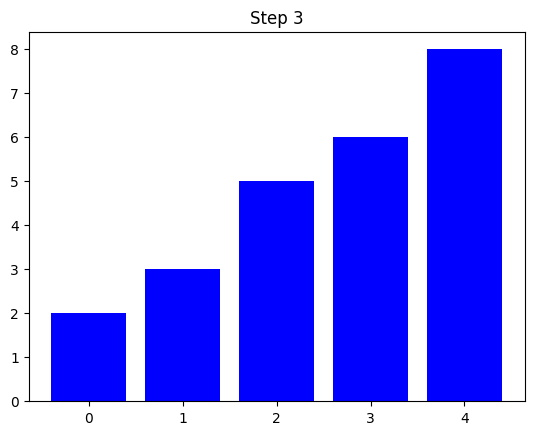

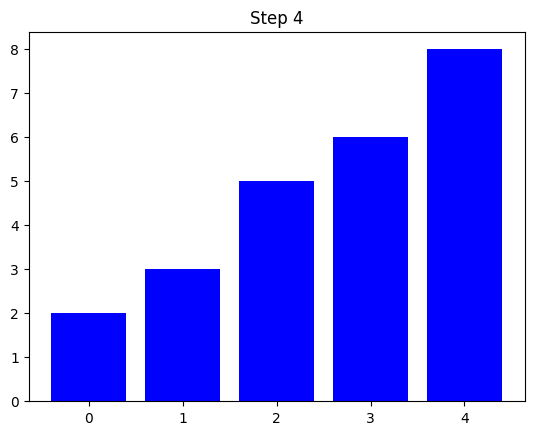

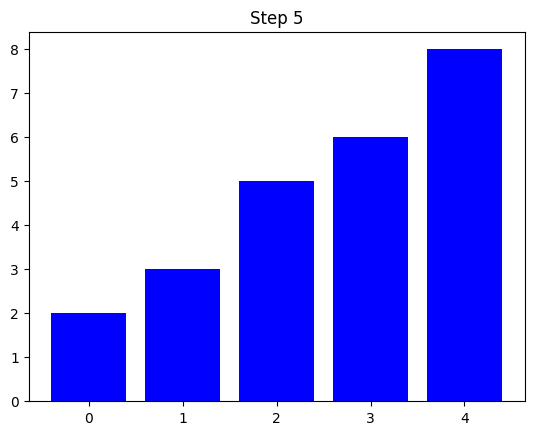

Sorted array: [2, 3, 5, 6, 8]


In [1]:
import matplotlib.pyplot as plt
import time

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_index = i
        for j in range(i+1, n):
            if arr[j] < arr[min_index]:
                min_index = j
        arr[i], arr[min_index] = arr[min_index], arr[i]  # Swap
        visualize_sort(arr, i)  # Visualization after each step

def visualize_sort(arr, step):
    plt.clf()
    plt.bar(range(len(arr)), arr, color='blue')
    plt.title(f"Step {step + 1}")
    plt.pause(0.5)

# User Input
arr = list(map(int, input("Enter numbers separated by space: ").split()))
print("Sorting steps:")
plt.ion()
selection_sort(arr)
plt.ioff()
plt.show()
print("Sorted array:", arr)


Enter the number of nodes:  6
Enter node 1:  0
Enter the number of edges for node 0:  3
Enter neighbor and weight:  1 4
Enter neighbor and weight:  2 4
Enter neighbor and weight:  3 6
Enter node 2:  1
Enter the number of edges for node 1:  3
Enter neighbor and weight:  0 4
Enter neighbor and weight:  2 2
Enter neighbor and weight:  4 5
Enter node 3:  2
Enter the number of edges for node 2:  3
Enter neighbor and weight:  0 4
Enter neighbor and weight:  1 2
Enter neighbor and weight:  5 3
Enter node 4:  3
Enter the number of edges for node 3:  2
Enter neighbor and weight:  0 6
Enter neighbor and weight:  5 4
Enter node 5:  4
Enter the number of edges for node 4:  2
Enter neighbor and weight:  1 5
Enter neighbor and weight:  5 7
Enter node 6:  5
Enter the number of edges for node 5:  3
Enter neighbor and weight:  2 3
Enter neighbor and weight:  3 4
Enter neighbor and weight:  4 7
Enter start node:  0


Running Prim's Algorithm...


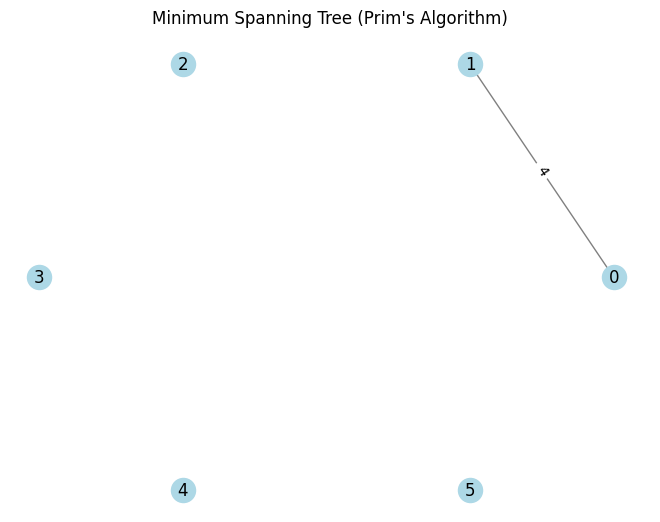

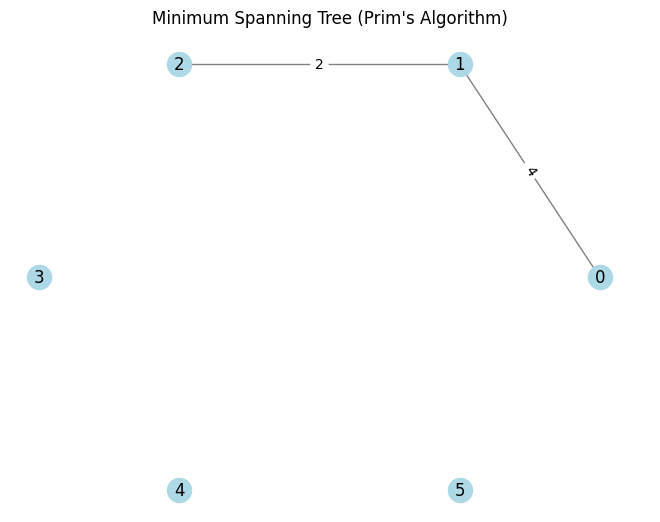

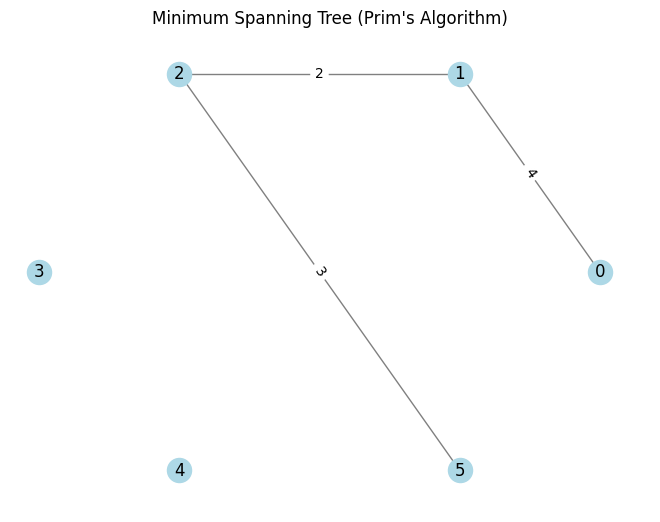

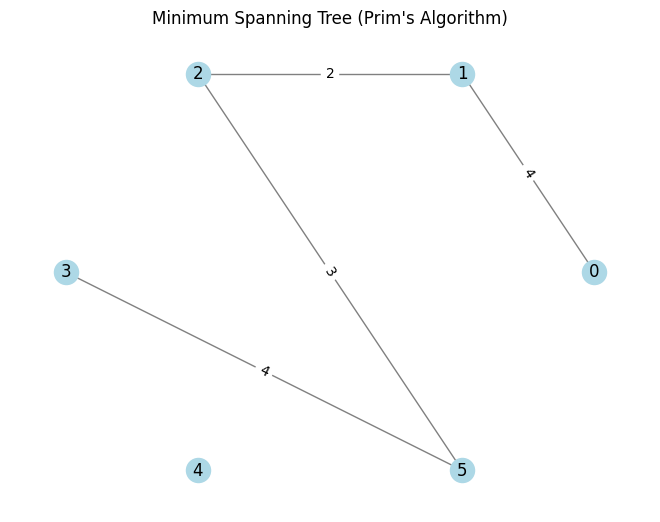

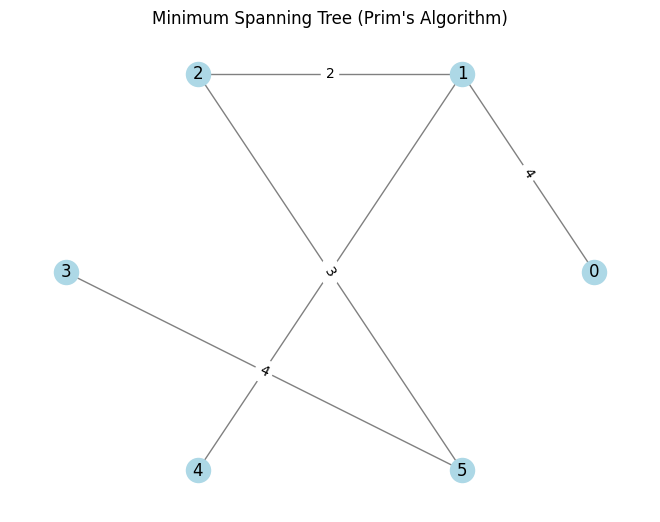

In [4]:
import networkx as nx
import heapq
import matplotlib.pyplot as plt

def visualize_graph(graph, edges, title="Graph Visualization"):
    G = nx.Graph()
    for node in graph:
        G.add_node(node)
    for edge in edges:
        u, v, w = edge
        G.add_edge(u, v, weight=w)
    pos = nx.circular_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    plt.clf()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(title)
    plt.pause(1)

def prims_mst(graph, start_node):
    n = len(graph)
    mst = []
    visited = set()
    pq = [(0, start_node, None)]  # (cost, node, parent)

    while len(mst) < n - 1:
        cost, node, parent = heapq.heappop(pq)
        if node in visited:
            continue
        visited.add(node)
        if parent is not None:
            mst.append((parent, node, cost))
            visualize_graph(graph, mst, "Minimum Spanning Tree (Prim's Algorithm)")
        for neighbor, weight in graph[node]:
            if neighbor not in visited:
                heapq.heappush(pq, (weight, neighbor, node))
    return mst

# User Input
n = int(input("Enter the number of nodes: "))
graph = {}
for _ in range(n):
    node = int(input(f"Enter node {_ + 1}: "))
    graph[node] = []
    edges_count = int(input(f"Enter the number of edges for node {node}: "))
    for _ in range(edges_count):
        neighbor, weight = map(int, input("Enter neighbor and weight: ").split())
        graph[node].append((neighbor, weight))
        if neighbor not in graph:
            graph[neighbor] = []
        graph[neighbor].append((node, weight))

start_node = int(input("Enter start node: "))

plt.ion()
print("Running Prim's Algorithm...")
prims_mst(graph, start_node)
plt.ioff()
plt.show()

Enter the number of nodes:  6
Enter node 1:  0
Enter the number of edges for node 0:  3
Enter neighbor and weight:  1 4
Enter neighbor and weight:  2 4
Enter neighbor and weight:  3 6
Enter node 2:  1
Enter the number of edges for node 1:  3
Enter neighbor and weight:  0 4
Enter neighbor and weight:  2 2
Enter neighbor and weight:  4 5
Enter node 3:  2
Enter the number of edges for node 2:  3
Enter neighbor and weight:  0 4
Enter neighbor and weight:  1 2
Enter neighbor and weight:  5 3
Enter node 4:  3
Enter the number of edges for node 3:  2
Enter neighbor and weight:  0 6
Enter neighbor and weight:  5 4
Enter node 5:  4
Enter the number of edges for node 4:  2
Enter neighbor and weight:  1 5
Enter neighbor and weight:  5 7
Enter node 6:  5
Enter the number of edges for node 5:  3
Enter neighbor and weight:  2 3
Enter neighbor and weight:  3 4
Enter neighbor and weight:  4 7
Enter start node:  0


Running Dijkstra's Algorithm...


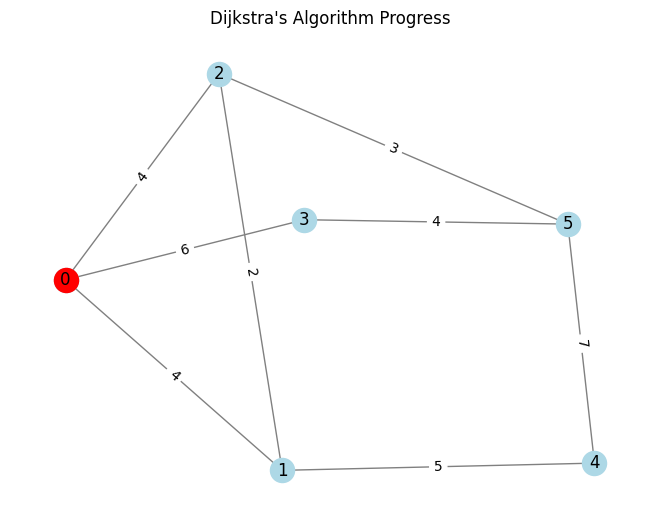

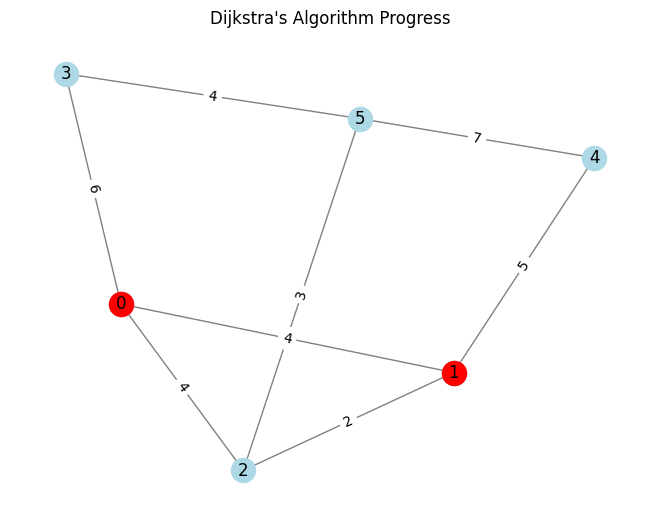

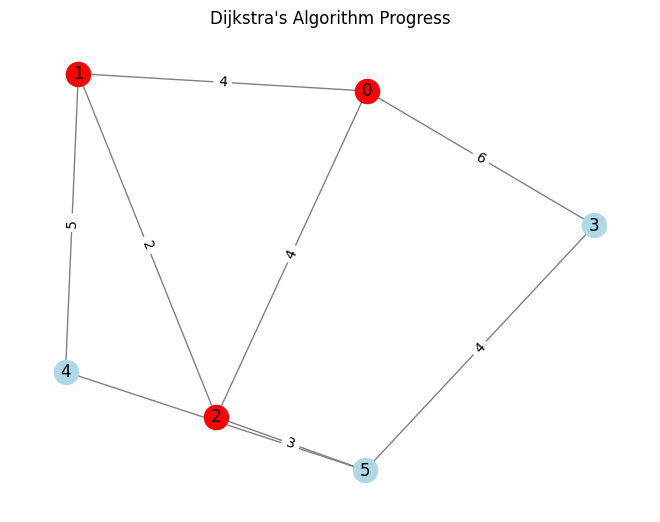

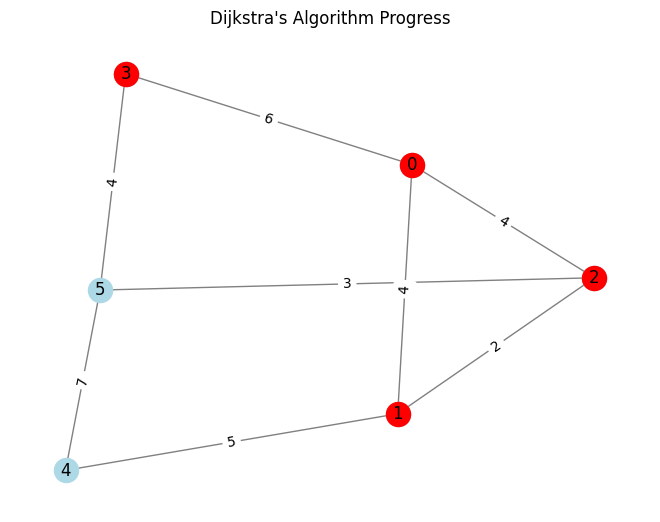

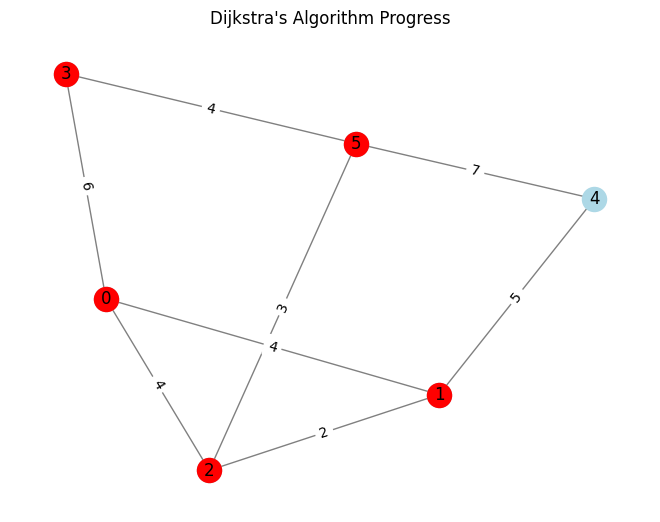

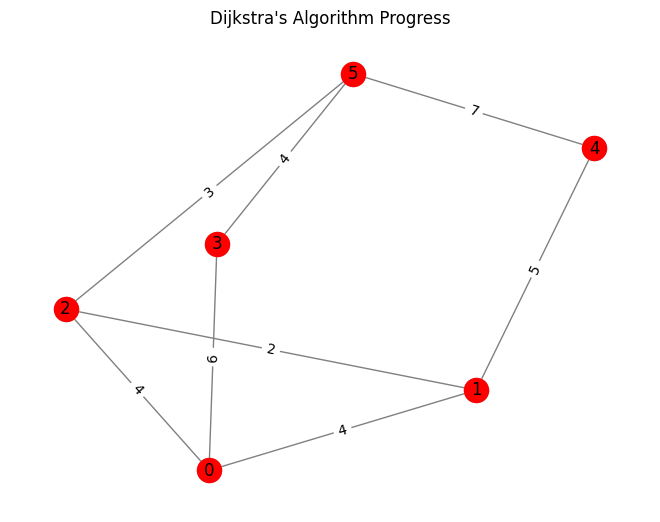

Shortest paths: {0: 0, 1: 4, 2: 4, 3: 6, 4: 9, 5: 7}


In [6]:
import heapq
import networkx as nx
import matplotlib.pyplot as plt

def visualize_dijkstra(graph, distances, visited):
    G = nx.Graph()
    
    for node in graph:
        G.add_node(node)
    
    for node, edges in graph.items():
        for neighbor, weight in edges:
            G.add_edge(node, neighbor, weight=weight)
    
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    plt.clf()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    nx.draw_networkx_nodes(G, pos, nodelist=visited, node_color='red')
    plt.title("Dijkstra's Algorithm Progress")
    plt.pause(1)

def dijkstra(graph, start):
    heap = [(0, start)]
    distances = {node: float('inf') for node in graph}
    distances[start] = 0
    visited = []
    
    while heap:
        cost, node = heapq.heappop(heap)
        if node in visited:
            continue
        
        visited.append(node)
        visualize_dijkstra(graph, distances, visited)
        
        for neighbor, weight in graph[node]:
            new_cost = cost + weight

            if new_cost < distances[neighbor]:
                distances[neighbor] = new_cost
                heapq.heappush(heap, (new_cost, neighbor))
    
    return distances

# Taking user input for graph construction
graph = {}
num_nodes = int(input("Enter the number of nodes: "))
for i in range(num_nodes):
    node = int(input(f"Enter node {i+1}: "))
    graph[node] = []
    num_edges = int(input(f"Enter the number of edges for node {node}: "))
    for _ in range(num_edges):
        neighbor, weight = map(int, input("Enter neighbor and weight: ").split())
        graph[node].append((neighbor, weight))

start_node = int(input("Enter start node: "))
plt.ion()
print("Running Dijkstra's Algorithm...")
print("Shortest paths:", dijkstra(graph, start_node))
plt.ioff()
plt.show()


In [8]:
def job_scheduling(jobs):
    jobs.sort(key=lambda x: x[1], reverse=True)
    result = []
    for job in jobs:
        result.append(job[0])
    return result

# User Input
n = int(input("Enter number of jobs: "))
jobs = []
for _ in range(n):
    name, profit = input("Enter job name and profit: ").split()
    jobs.append((name, int(profit)))

print("Scheduled Jobs:", job_scheduling(jobs))


Enter number of jobs:  5
Enter job name and profit:  A 50
Enter job name and profit:  B 10
Enter job name and profit:  C 30
Enter job name and profit:  D 60
Enter job name and profit:  E 40


Scheduled Jobs: ['D', 'A', 'E', 'C', 'B']


Enter the number of nodes:  6
Enter the number of edges:  9


Enter edges in the format: u v weight


 0 1 4
 0 2 4
 1 2 2
 1 3 6
 2 3 8
 2 4 10
 3 4 5
 3 5 3
 4 5 7


Running Kruskal's Algorithm...


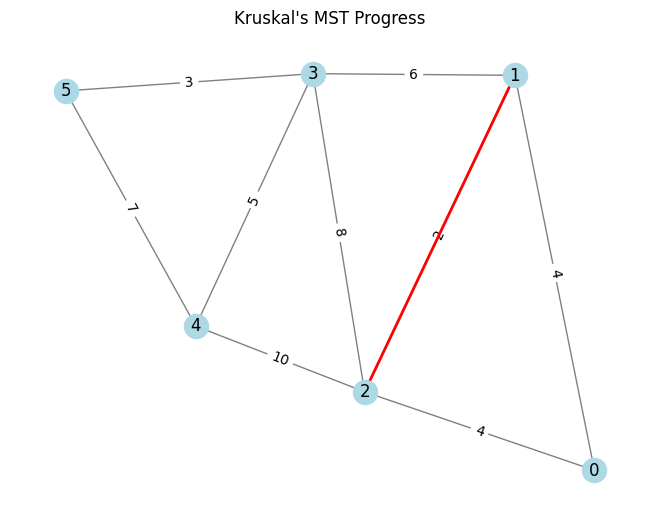

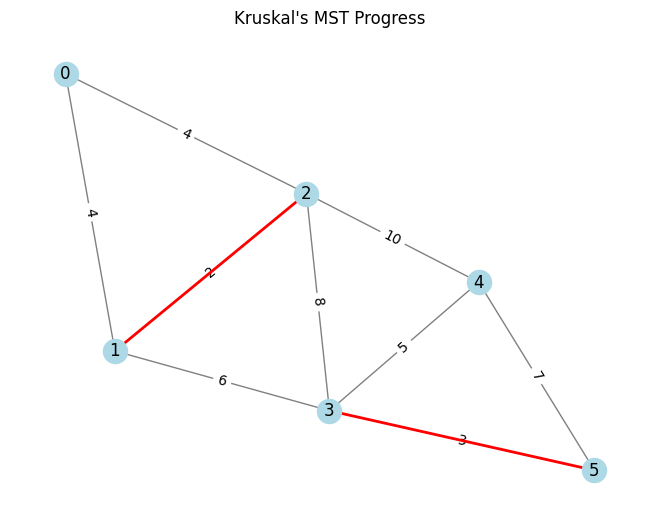

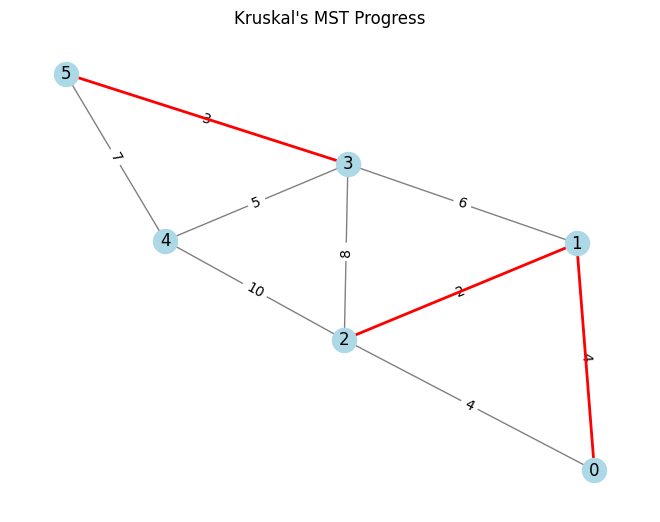

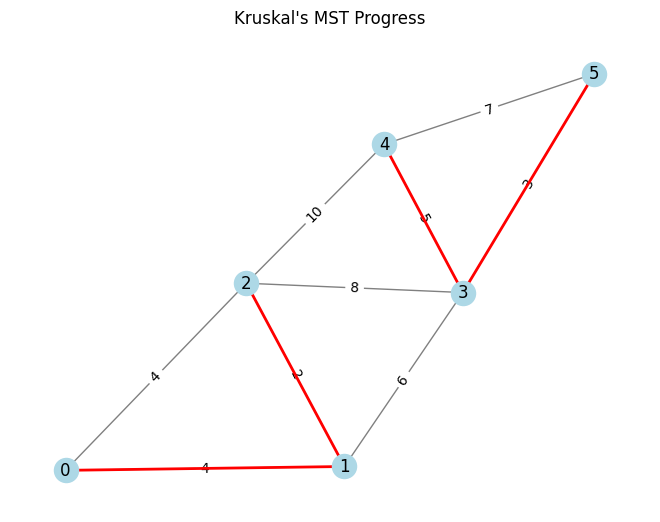

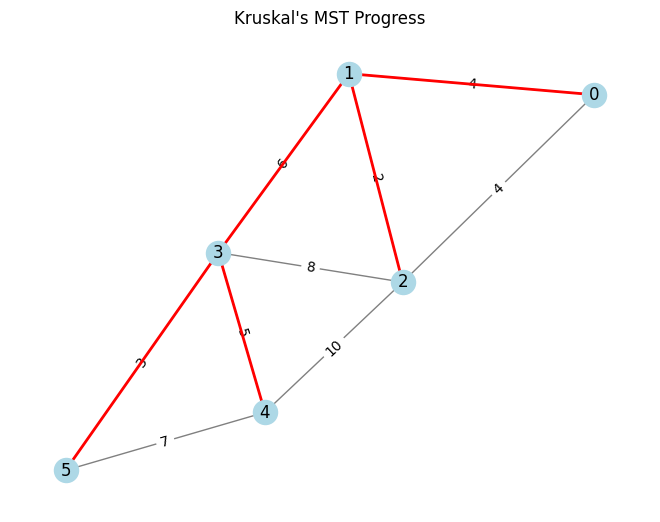


Minimum Spanning Tree (MST): [(1, 2, 2), (3, 5, 3), (0, 1, 4), (3, 4, 5), (1, 3, 6)]


In [11]:
import networkx as nx
import matplotlib.pyplot as plt

def visualize_kruskal(edges, mst):
    """Function to visualize the graph and the MST in Kruskal’s algorithm."""
    G = nx.Graph()
    for u, v, w in edges:
        G.add_edge(u, v, weight=w)
    
    pos = nx.spring_layout(G)
    labels = nx.get_edge_attributes(G, 'weight')
    
    plt.clf()
    nx.draw(G, pos, with_labels=True, node_color='lightblue', edge_color='gray')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    
    # Highlight MST edges in red
    mst_edges = [(u, v) for u, v, _ in mst]
    nx.draw_networkx_edges(G, pos, edgelist=mst_edges, edge_color='red', width=2)
    
    plt.title("Kruskal's MST Progress")
    plt.pause(1)

def find(parent, v):
    """Find function for Disjoint Set (Union-Find)."""
    if parent[v] != v:
        parent[v] = find(parent, parent[v])
    return parent[v]

def union(parent, rank, u, v):
    """Union function for Disjoint Set (Union-Find)."""
    root_u = find(parent, u)
    root_v = find(parent, v)
    
    if root_u != root_v:
        if rank[root_u] > rank[root_v]:
            parent[root_v] = root_u
        elif rank[root_u] < rank[root_v]:
            parent[root_u] = root_v
        else:
            parent[root_v] = root_u
            rank[root_u] += 1

def kruskal(edges, n):
    """Function to compute MST using Kruskal’s Algorithm."""
    edges.sort(key=lambda x: x[2])  # Sort edges by weight
    parent = {i: i for i in range(n)}
    rank = {i: 0 for i in range(n)}
    
    mst = []
    
    for u, v, weight in edges:
        if find(parent, u) != find(parent, v):  # Check if adding edge forms a cycle
            mst.append((u, v, weight))
            union(parent, rank, u, v)
            visualize_kruskal(edges, mst)
    
    return mst

# User Input
edges = []
n = int(input("Enter the number of nodes: "))
m = int(input("Enter the number of edges: "))

print("Enter edges in the format: u v weight")
for _ in range(m):
    u, v, w = map(int, input().split())
    edges.append((u, v, w))

plt.ion()
print("Running Kruskal's Algorithm...")
mst_result = kruskal(edges, n)
plt.ioff()
plt.show()

print("\nMinimum Spanning Tree (MST):", mst_result)
